# CNN (Convolution Neural Network, 합성곱 신경망)

* 합성곱 신경망(Convolutional neural network, CNN)은 시각적 영상을 분석하는 데 사용되는 다층의 피드-포워드적인 인공신경망의 한 종류이다. 
*  딥 러닝에서 심층 신경망으로 분류되며, 시각적 영상 분석에 주로 적용된다. 또한 공유 가중치 구조와 변환 불변성 특성에 기초하여 변이 불변 또는 공간 불변 인공 신경망 (SIANN)으로도 알려져 있다. 영상 및 동영상 인식, 추천 시스템, 영상 분류, 의료 영상 분석 및 자연어 처리 등에 응용된다.
![CNN.png](https://www.hanbit.co.kr/data/editor/20190619112507_cybcirlh.jpg)

[합성곱_신경망](https://ko.wikipedia.org/wiki/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D)

![CNN_CAT.png](https://blog.kakaocdn.net/dn/nni6z/btqBD2aVqYg/uYXKGG1VB7LjZpua8OTOwK/img.png)

* CNN은 1989년 “Backpropagation applied to handwritten zip code recognition, LeCun, 1989” 에서 처음 소개되었으며, 고양이가 어떠한 이미지를 볼 때, 뇌에서 일어나는 반응을 통해 고안되었다. 
* 고양이는 어떤 이미지를 인식할 때, 이미지를 부분 단위로 나누어 인지하며, 이에 대한 각각의 정보를 취합함으로써 이미지를 인지하는 모습을 보여 주었습니다. 따라서 이러한 배경에 착안하여 CNN에 대한 방법론이 발전하게 되었습니다. 

# CNN의 기본 Concept

## CNN의 Flow

![CNN_flow.png](http://itwiki.kr/images/thumb/d/de/CNN2.jpeg/1200px-CNN2.jpeg)
* CNN 모형의 흐름은 대략 아래의 과정을 거쳐 학습을 진행합니다. 
    1. 입력된 이미지를 다양하게 분할하여, convolution layer에 전달합니다. 
    2. 이는 곧 Relu 혹은 다양한 활성함수를 거쳐 다음 Convolution layer로 전달됩니다.  
    3. 위의 두 과정을 여러번 거친 값들은 Pooling이라는 과정을 거치게 되고, 다음 Convolution layer로 전달되게 됩니다. 
    4. 위의 3가지 단계를 반복적으로 진행한뒤, 최종적인 Pooling과정을 진행합니다.  
    5. 이후, 해당 값들은 Fully Connected Layer의 입력으로 전달됩니다. 이를 통해, 최종적으로는 각각의 범주(label)에 해당하는 값을 도츨하는 softmax classifier를 거쳐 최종적인 분류를 진행하게 됩니다.  
![CNN_flow2.png](https://miro.medium.com/max/1400/1*GPBRUVqDhQxDuW8r6X5n7g.png)

**이제 해당 아이디어의 세부 과정을 간단히 살펴보겠습니다.**

## 1. Convolution Layer

![convolution_layer.png](https://indoml.files.wordpress.com/2018/03/convolution-with-multiple-filters2.png?w=979)
* 합성곱 단계는 전체의 이미지를 부분으로 나누어 중첩적으로 살펴보는 과정입니다. 
* 한장의 convolution은 동일한 Filter(or kernal)을 가지고 이미지를 부분적으로 보며 이동하며, 이때 각각의 일부는 filter를 통해 하나의 값으로 수렴되게 됩니다. 
* 이러한 과정을 여러개의 filter를 통해 반복하여, 여러장의 convolution matrix를 생성해 다음 레이어로 넘겨주는 계층입니다. 
![convolution_layer2.png](https://blog.kakaocdn.net/dn/KFdhP/btqw7vinnlH/4DhWN8silAnmFNmLos2yAK/img.png)
1. 이미지의 일부를 하나의 필터에 투과시키면, 해당 부분은 하나의 스칼라 값으로 변화합니다.  

$$\bar{y} = W_1x_1 + W_2x_2 + W_3x_3 + W_4x_4 + W_5x_5 + b $$  

2. 동일한 필터(가중치 행렬)를 이용해 이미지의 전체를 한장의 행렬로 변환합니다. [W1~W5]
![convolution_layer3.png](https://t1.daumcdn.net/cfile/tistory/999D0F335B61925F0F)  

3. 동일한 과정을 여러개의 필터를 이용해 반복적으로 수행하여 
![convolution_layer4.png](https://user-images.githubusercontent.com/31475037/59593108-50b2e280-912c-11e9-8619-798ff2464b9b.png)  

4. 여러장의 행렬을 구성하여 다음 계증에 전달합니다.   

![conv_example.png](https://anhreynolds.com/img/cnn.png)
![conv_example2.png](https://cdn-images-1.medium.com/max/1600/1*7S266Kq-UCExS25iX_I_AQ.png)

##### 각각의 필터를 통해 도출된 output의 차원은? 
* 각 필터를 거친 한장의 그림의 차원은 **이미지의 크기**와 **필터의 크기**, **Stride**에 따라 달라집니다.  
    1. filter의 크기는 곧, 이미지를 몇 칸씩 한 단위로 읽어들일 것인가를 의미하며,  
    2. Stride는 한 이미지를 몇칸씩 띄워 살펴볼 것인지를 의미합니다. 
![out_shape.png](https://adeshpande3.github.io/assets/Stride1.png)    
    - 예를들어, 위의 이미지의 입력은 7x7의 입력이며, filter의 크기는 3x3의 크기입니다.  
    - 이때, 이미지를 좌로 한칸씩 이동하며, 세로에 대해서도 한칸씩 내려가며 이미지를 살펴본다고 가정해 봅시다.  
    - 이때 1칸씩 이동한다는 의미는 **stride = 1**이라고 표현 가능합니다.
    - 이러한 경우, 직접 확인해 본다면, output의 차원은 5x5가 됨을 알 수 있습니다. 
![stride2.png](https://blog.kakaocdn.net/dn/bsEbFY/btqKnpPtOMO/vTPHZbOunbRXkcHgRZ91x0/img.png) 
* 마찬가지로 stride가 2인 경우에는 위와 같은 차원을 얻을 수 있을 것입니다. 
  
  **이를 일반화한 수식은 다음과 같습니다.**
  $$Output Size = (\frac{N-F}{stride}) +1 $$
  ![fo.png](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile8.uf.tistory.com%2Fimage%2F261CE14F57AB46151178C3)

## Padding

* 위와 같은 convolution 층을 거치면 간혹 문제가 발생할 수 있습니다. 
* 그 이유는, 너무 많은 레이어를 거친다면, 이미지의 크기가 점점 작아져, 이미지가 담고 있는 어떤 의미를 잃어버리게 되기 때문입니다. 
* 이를 해결하기 위해 **패딩**과정을 거치게 됩니다.

![패딩.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnc73zIMbjcd9BbU1NoqmO9jSqMfA9PpTz4ihYnHhHSs5UmvA6EM8peXkyHqL620vJ8yI&usqp=CAU)  
* 패딩이란 : 이미지의 테두리에 일반적으로 0을 입력하여 감싸주는 작업을 의미합니다. 
* 패딩을 수행하는 이유는  
    1. 이미지의 축소를 방지 
    2. 모서리에 대한 위치적 정보 제공 
    등에 있습니다.  
![pading_result.png](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F9992A2495BA9CB5C0A0811) 
* 예를들어 위의 그림의 경우, 패딩을 함으로써, 입력과 출력의 차원이 같아지는 마법을 경험할 수 있습니다.

## 차원에 대한 이야기 

![one_conv.png](https://seoyoungh.github.io/assets/images/Screen%20Shot%202019-10-19%20at%2010.20.50%20PM.png) 
* 6개의 필터를 지닌 convolution layer를 거치게 되면 차원은 위와 같이 변화 하게 됩니다. 
![two_conv.png](https://slidetodoc.com/presentation_image_h/fd763925fd0d4bcde56b2896942885e9/image-12.jpg)
* 해당 과정은 다음 계층에서도 마찬가지로 일어납니다. 
* 이때, 가중치의 갯수는 차원에 대한 정보에서 알 수 있습니다.
* 즉, 각 차원의 값을 모두 곱하면, 하나의 계층의 가중치의 갯수를 알 수 있습니다. 

## Pooling layer 
![pool.png](https://gblobscdn.gitbook.com/assets%2F-LvMRntv-nKvtl7WOpCz%2F-LvMRp9FltcwEeVxPYFs%2F-LvMRrqrlhiBpH5LD-_p%2FPooling_Simple_max.png?alt=media)
* Pooling은 일정의 샘플링 방식입니다. 
* Cnvolution 계층에서 도출되는 행렬들의 뭉치에서, 각각의 행렬을 가져와 특정 방법으로 각각의 차원을 축소 요약한 뒤 다시 합쳐주는 방식입니다. 

##### MAX Pooling 
* 가장 대표적이고, 이해가 편리한 Polling 방식은 **MAX POOLing** 방식입니다. 
![MP.png](https://gblobscdn.gitbook.com/assets%2F-LvMRntv-nKvtl7WOpCz%2F-LvMRp9FltcwEeVxPYFs%2F-LvMRrqrlhiBpH5LD-_p%2FPooling_Simple_max.png?alt=media)
* 위의 그림은 하나의 filter에 대한 결과 행렬입니다. 이때, max pooling은 한장의 일부씩 선택하여, 해당 조각에서 가장 큰 값을 골라 하나로 요약하는 방식입니다. 

* 이처럼, 합성층의 결과를 요약하여 정리하는 과정을 pooling이라고 합니다.   

(아마도 제 생각에는, max pooling의 의미는, 가중치를 곱해 가장 큰 수가 나온다는것은 가장 큰 의미를 갖는 특성이라고 받아들여, 해당 값을 선택하는 것 같습니다.)

## Fully connected Layer 
* Conv와 pooling과정을 여러번 거쳐 도출된 값은, 이후 분류를 위해, Fully connected layer의 입력으로 들어가 결과화 됩니다.
![마지막.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQRCBcIt4KFH-55Qa7X3GsV0a2woNYXYt48HQ&usqp=CAU)

# CNN Basic 

## CNN Basic : Convolution Layer 구현 

### 분석환경 설정 

#### 라이브러리 불러오기 

In [1]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 

import matplotlib.pyplot as plt 

#### Toy image 생성 

In [2]:
image = tf.constant([[[[1], [2], [3]],
                    [[4], [5], [6]],
                     [[7], [8], [9]]]], dtype= np.float32)


(1, 3, 3, 1)


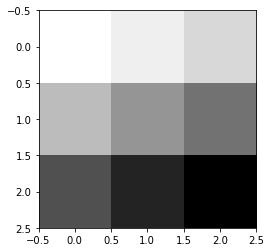

In [3]:
# 이미지의 모양 출력 및 시각화 
print(image.shape)

# 시각화 부분 
# imshow -> image show 
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')
plt.show()

image.numpy() :: 텐서를 넘파이 어레이로 변환후 .reshape(3,3) :: 3x3 으로 크기 재 지정 

### 1 filter (2,2,1,1) with padding: VALID

* (2,2,1,1) -> (width, heught, channel, # of filters)
* padding --> Valid (패딩을 진행하지 않음)  
![one_filter_valid.png](https://camo.githubusercontent.com/feef340e25d2a10a0bd1e96352777a32e4137f2a/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32343833333337352f63306439633236322d316366392d313165372d396566632d3564643666653066656462302e706e67)

In [4]:
# 이미지의 크기 정보 
print("image.shape", image.shape)

image.shape (1, 3, 3, 1)


* 텐서플로우의 데이터 차원 표현 방식에는 크게 **Channels_last**방식과 **Channels_first**방식이 있습니다. 
* 그중, **Channels_last**방식이 default로 적용 됩니다. 
* **Channels_last**방식의 표현 순서는 아래와 같습니다. 
    - (batch, height, width, channels)
    - batch :: 입력된 이미지의 장 수
    - channels :: 여기에서는 RGB 

In [5]:
# filter 설정, 즉, 가중치 설정 
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

weight.shape (2, 2, 1, 1)


* 필터의 차원 정보의 경우, 표현의 순서가 다소 다르게 나옴을 볼 수 있습니다. 
* (height, width, in_channel, out_channel)
    - in_channel 은 이미지에서 들어오는 채널의 크기와 동일하게 설정합니다. 
    - out channel의 경우 필터의 수라고 보면 됩니다. 이는 다음층의 인체널의 크기와 동일 해야 합니다, 

In [6]:
weight_init = tf.constant_initializer(weight)

##### 실제 convolution layer의 선언과 데이터 전달

In [7]:
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID', 
                             kernel_initializer=weight_init)(image)

* keras.layer.Conv2D 를 이용합니다. 
    - filter : filter의 수를 입력합니다. 
    - kernal size의 경우, 2, (2,2), [2,2] 모두로 입력 가능합니다. 
    - padding 의 경우 'VALID', 'SAME' 두개의 옵션이 있습니다. 
    - kernal initalizer로 kernal(filter)의 초기 가중치를 전달하고 
    - (image)를 통해 정보를 전달하여 변환합니다. 

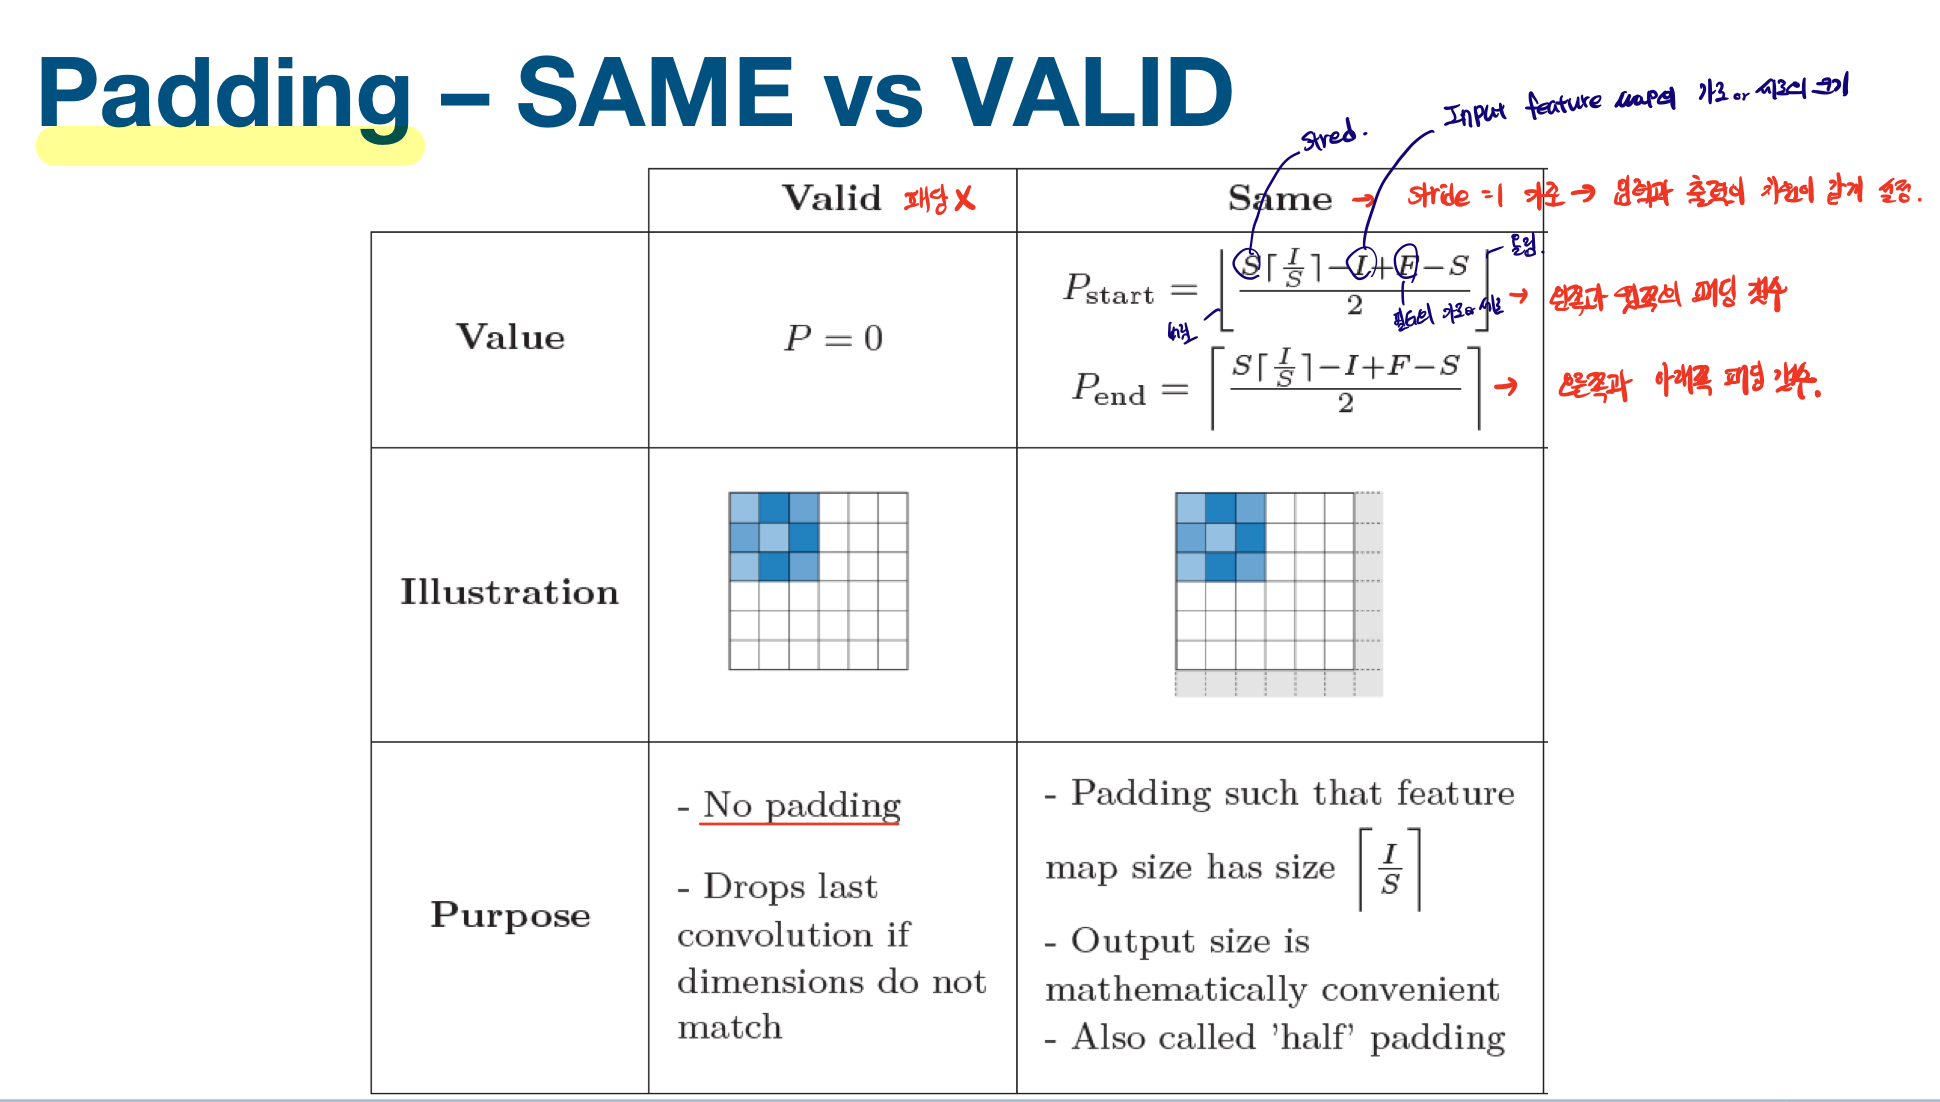

In [8]:
print("conv2d.shape", conv2d.shape)

# 실제 값 출력 
print(conv2d.numpy().reshape(2,2))

conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


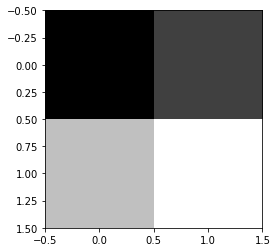

In [9]:
# 시각화 
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

### 1 filter (2,2,1,1) with padding: SAME 

* (2,2,1,1) -> (width, heught, channel, # of filters)
* padding --> SAME (패딩을 진행, stride 1 을 기준으로 , 입력의 차원과 출력의 차원이 같도록 설정), (만약 stride 2 라면 출력의 크기는 입력의 크기의 반으로 줄어든다 ) 
![SAME.png](https://camo.githubusercontent.com/8e45f346468e2ebf8a27ae82c24776cc3b530ce6/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32343833333338312f66643031383639652d316366392d313165372d396435392d6466303863376336653563342e706e67)

In [10]:
# 입력 데이터 차원 정보 
print("image shape", image.shape)

image shape (1, 3, 3, 1)


In [11]:
# 입력데이터 형태 
image.numpy().reshape(3,3)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)

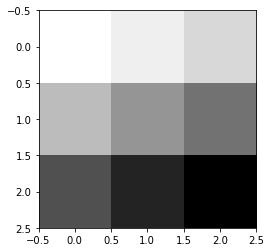

In [12]:
# 입력데이터 시각화 
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')

In [13]:
# filter의 weight 설정 
weight = np.array([[[[1.]],[[1.]]],
                  [[[1.]], [[1.]]]], dtype=np.float32)

print(weight.shape)

(2, 2, 1, 1)


In [14]:
# 텐서플로우의 형태에 맞게 초기화 선언 
weight = tf.constant_initializer(weight)

In [15]:
# 실제 데이터 적합 
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, 
                            padding = 'SAME', kernel_initializer = weight_init)(image)

In [16]:
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))

conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


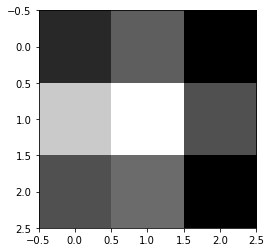

In [17]:
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

### 3filter (2,2,1,3) 

In [18]:
print("image.shape", image.shape)

image.shape (1, 3, 3, 1)


In [19]:
weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                   [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)

weight.shape (2, 2, 1, 3)


##### 주의! 필터의 형태 
* 3개의 필터의 형태는 다음과 같습니다.   

[[1],[1],  
[1], [1]]  
  
[[10], [10],  
[10], [10]]  
  
[[-1], [-1],  
[-1], [-1]]

In [20]:
weight_init = tf.constant_initializer(weight)

In [21]:
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)

In [22]:
print("conv2d.shape", conv2d.shape)

conv2d.shape (1, 3, 3, 3)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


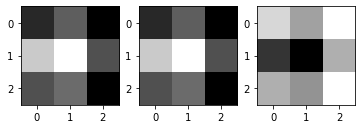

In [23]:
feature_maps = np.swapaxes(conv2d, 0, 3)

for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

## CNN Basic : MAX Pooling 

* pooling 과정은 샘플링을 통해 데이터의 특성을 요약하는 방식입니다. 
    - max pooling은 각 조각에서 가장 큰 수를 추출하는 방식입니다. 
    ![maxpool.png](https://camo.githubusercontent.com/fbec3b209ab152abdfabf63f081c3fd047d5cffd/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32333333373637362f62643135346461322d666333302d313165362d383838632d6438366263323230363036362e706e67)

* 아래 형태의 데이터를 기준으로 max pooling을 짆행합니다. 
* 입력 데이터의 크기와 동일한 크기의 데이터를 얻기위해 padding을 적용합니다. 
![pool_origine.png](https://camo.githubusercontent.com/04831ba0a6fcb63640f3ea2c3b5d8479c08f8f49/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32333334303335352f61346264336330382d666336662d313165362d386139392d3165336262626538363733332e706e67)

In [24]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)

(1, 2, 2, 1)
[[4. 3.]
 [2. 1.]]


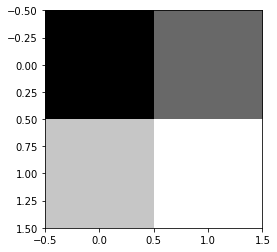

In [25]:
print(image.shape)

print(image.numpy().reshape(2,2)) 

plt.imshow(image.numpy().reshape(2,2), cmap='Greys')
plt.show()

### pooling without padding 

In [26]:
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='VALID')(image)

In [27]:
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


### pooling with padding 
* SAME : Zero padding 
![Zero padding.png ](https://camo.githubusercontent.com/9867aae562c82293ec18d75eaee213e723b3cc88/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32333334303333372f37316232373635322d666336662d313165362d393665662d3736303939383735356637372e706e67)

In [28]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)

(1, 2, 2, 1)
[[4. 3.]
 [2. 1.]]


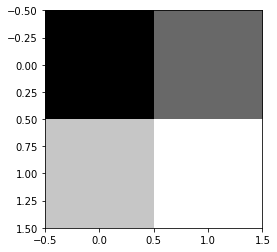

In [29]:
print(image.shape)

print(image.numpy().reshape(2,2)) 

plt.imshow(image.numpy().reshape(2,2), cmap='Greys')
plt.show()

In [30]:
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(image)

In [31]:
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## CNN Basic : Mnist 

### 분석환경 구성 

In [32]:
from tensorflow.keras.datasets import mnist

In [33]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [34]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [35]:
train_images = train_images.astype(np.float32)/ 255.
test_images = test_images.astype(np.float32)/ 255.

### 이미지 확인 

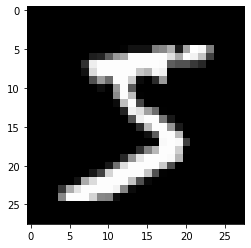

In [36]:
# 이미지 한장을 살펴봅니다. 
img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

### convolution layer에 투과하기 
* 5개의 필터를 적용해 각각의 결과를 시각화합니다. 
* 이미지의 형태를 유지하기 위해 padding same 옵션을 적용해 진행합니다. 

In [37]:
# 이미지 한장의 형태를 봅니다.
img.shape

(28, 28)

In [38]:
# convolution layer의, 입력 형태에 맞도록 이미지의 차원을 수정합니다.
img = img.reshape(-1,28,28,1)
img.shape
# (배치크기,넓이,높이,채널)

(1, 28, 28, 1)

In [39]:
# 텐서로 전환
img = tf.convert_to_tensor(img)

In [40]:
# 필터 가중치를 랜덤으로 설정해줄 기계 
weight_init = keras.initializers.RandomNormal(stddev=0.01)

In [41]:
# 5개의 필터를 생성함과 동시에, 이미지를 각각 투과 
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2, 2), padding='SAME', 
                             kernel_initializer=weight_init)(img)

In [42]:
print(conv2d.shape)

(1, 14, 14, 5)


필터의 수에 맞게 out channel이 5개가 생성됨을 볼 수 있습니다. 

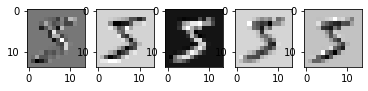

In [43]:
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

각각의 필터로 인해 생성된 이미지의 결과가 상이함을 볼 수 있습니다. 

### Pooling 

In [44]:
pool = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')(conv2d)
print(pool.shape)

(1, 7, 7, 5)


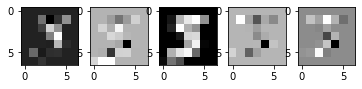

In [45]:
feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7, 7), cmap='gray')
plt.show()

# tf.Keras.Sequential  API를 활용한 CNN 모형 구현 
* 텐서플로우에서 제공하는 sequential high level api를 활용하여 간단한 CNN모형을 구현합니다. 
![CNN_minist.png](https://miro.medium.com/max/1838/1*fGaM1r0T4LAJFkMJRMMA3g.png)
* 모형의 전체적인 구조는 위와 같습니다. 
    - conv. layer with 32filter and stride 1, padding 'SAME'  
        - max pooling with stride 2, padding = 'SAME' 
    - conv. layer with 64filter and stride 1, padding 'SAME'  
        - max pooling with stride 2, padding = 'SAME'
    - conv. layer with 128filter and stride 1, padding 'SAME'  
        - max pooling with stride 2, padding = 'SAME'  
    - Fully connected layer 
        - flatten layer 
        - 256 unit Dense
        - 10 unit Dense for result 

## 분석환경 구성 

In [50]:
import tensorflow as tf 
from tensorflow import keras 

# 레이블 원핫인코딩을 위한 라이브러리 
from tensorflow.keras.utils import to_categorical

# 텐서 연산 및 변환을 위한 라이브러리 
import numpy as np 

# 이미지 시각화를 위한 도구 
import matplotlib.pyplot as plt 
%matplotlib.pyplot inline 

# 체크포인트 경로 설정을 위한 운영체제 라이브러리  
import os 

UsageError: Line magic function `%matplotlib.pyplot` not found.


## Hyper parameter 구성 

In [51]:
# 학습률 지정 
learning_rate = 0.001 
# 에포크 15회 
training_epochs = 1 
# 배치크기 지정 
batch_size = 100 

# 랜덤시드 지정 
tf.random.set_seed(777)

## 모델 체크포인트 directory 설정 
* 실습 내용에 언급되어 있긴 하지만, 해당 내용은 반영하지 않고 진행합니다. 

In [52]:
# cur_dir = os.getcwd()
# ckpt_dir_name = 'checkpoints'
# model_dir_name = 'minst_cnn_seq'

# checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
# os.makedirs(checkpoint_dir, exist_ok=True)

# checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

## Dataset 불러오기 

### MNIST 데이터 

In [53]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

### Fashion Mnist Data 

In [54]:
## Fashion MNIST Dataset 
#Fmnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Dataset 사전 처리 

In [55]:
# 데이터 불러오기 및 학습 및 테스트 데이터로 나누기 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [56]:
# 데이터 스케일링 
# 각각의 픽셀에 들어있는 0~255의 밝기 값을 0~1 사이로 축소합니다. 
# 이는 모델의 성능을 개선하기 위해 분산을 축소하는 작업입니다. 
train_images = train_images.astype(np.float32)/255.
test_images = test_images.astype(np.float32)/255.

In [57]:
# 이미지의 차원에 채널을 추가하여 4D 구조로 만들어 줍니다. 
# 이는 CNN모형의 입력의 형태가 4D Tensor 구조여야 함을 반영하는것입니다. 
# 채널은 색상값을 입력합니다. 
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [58]:
# 레이블의 범주를 원핫인코딩 해줍니다. 
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

##### DATA PIPLineing 
* 이후 학습을 진행할때, 모형에 데이터를 배치의 크기만큼씩 끊어 올려주는 역할을 수행합니다. 
* 기본적으로 버퍼 자료구조를 이용하며, 텐서플로우에서 제공하는 Dataset.from tensorslice를 이용해 간단하게 구현이 가능합니다. 
* 기본 옵션 설명 
    - dataset :: ()튜플구조로 데이터와 정답을 함께 입력합니다. 
    - shuffle :: 데이터를 수행시마다 섞어주어 과적합을 방지합니다. 이는 훈련 데이터에만 적용하면 됩니다. 이때, 버퍼의 크기를 함께 지정해줍니다. 
    - .batch() : 배치의 크기를 지정해줍니다.
    
* 활용 예시 및 설명 
""" Graph Input using Dataset API """
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).\//데이터 입력    
    shuffle(buffer_size=100000).\ //버퍼를 활용한 셔플링  
    prefetch(buffer_size=batch_size).\ // 다음 학습할 배치를 미리 메모리상에 준비합니다  
    batch(batch_size, drop_remainder=True) // drop_remainder=True 한번 사용한 데이터는 제거  
   

In [59]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

## 모형 생성 함수 구현 

In [62]:
def create_model(): 
    model = tf.keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, padding='SAME',
                                  input_shape = (28,28,1))) # 가장 첫 레이어에는 입력 크기를 보여주는게 좋습니다. 
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu, padding='SAME')) 
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, padding='SAME')) 
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    # FC layer 시작 ################################ 
    model.add(keras.layers.Flatten())
    # 분류를 위한 FC 모형에는 반드시 일차원의 백터 형식의 입력이 필요합니다. 
    model.add(keras.layers.Dense(256, activation=tf.nn.relu))
    # 위에서 가중치의 갯수가 너무 많아 40%의 드롭아웃을 적용합니다. 
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(10))
    return model 

In [61]:
# keras.layers.MaxPool2D? 
# 기본입력 : 
# stride 2 
# 2 x 2 filter 

개인적인 의문은 마지막 Dense층에 활성함수로 softmax함수를 왜 지정하지 않았는지 입니다. 
(Dense layer의 기본적인 activation 함수는 a(x) = x 의 선형함수입니다. 

In [63]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

## 손실함수 정의 
* softmax regression이 적용됨으로 cross entropy를 지표로 사용합니다. 

In [64]:
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        y_pred=logits, y_true=labels, from_logits=True))    
    return loss

## 기울기 추적함수 정의 

In [65]:
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

## 모형 성능 지표 

In [66]:
def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

## Optimizer 정의 
* 기울기를 반영하여 가중치를 갱신해줄 최적화 도구입니다. 
* 가장 널리쓰이는 adam optimizer를 이용합니다 .

In [67]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

## 학습과정 

### 체크포인트가 있는 버전 

In [68]:
# checkpoint = tf.train.Checkpoint(cnn=model)

In [70]:
# def train(model, images, labels):
#     grads = grad(model, images, labels)
#     optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [71]:
# # train my model
# print('Learning started. It takes sometime.')
# for epoch in range(training_epochs):
#     avg_loss = 0.
#     avg_train_acc = 0.
#     avg_test_acc = 0.
#     train_step = 0
#     test_step = 0    
    
#     for images, labels in train_dataset:
#         train(model, images, labels)
#         #grads = grad(model, images, labels)                
#         #optimizer.apply_gradients(zip(grads, model.variables))
#         loss = loss_fn(model, images, labels)
#         acc = evaluate(model, images, labels)
#         avg_loss = avg_loss + loss
#         avg_train_acc = avg_train_acc + acc
#         train_step += 1
#     avg_loss = avg_loss / train_step
#     avg_train_acc = avg_train_acc / train_step
    
#     for images, labels in test_dataset:        
#         acc = evaluate(model, images, labels)        
#         avg_test_acc = avg_test_acc + acc
#         test_step += 1    
#     avg_test_acc = avg_test_acc / test_step    

#     print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
#           'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
#           'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
#     checkpoint.save(file_prefix=checkpoint_prefix)

# print('Learning Finished!')

### 체크포인트가 없는 버전 

In [79]:
print("Learing started!")
for epoch in range(training_epochs):
    for idx, (train_input, train_label) in enumerate(train_dataset):
        grads = grad(model, train_input, train_label)
        optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))
        
        train_loss = loss_fn(model, train_input, train_label)
        train_accuracy = evaluate(model, train_input, train_label)
        
    for test_input, test_label in test_dataset:
        test_accuracy = evaluate(model, test_input, test_label)
       
    print("Epoch: [%2d],training loss: [%.8f], train_acc: [%.4f], test_acc: [%.4f]"\
            %(epoch,train_loss, train_accuracy,test_accuracy))
    
print("All epochs ended!! Learing completed!")

Learing started!
Epoch: [ 0],training loss: [0.00508959], train_acc: [1.0000], test_acc: [1.0000]
All epochs ended!! Learing completed!


모형의 복잡도로 인해 1에포크만을 확인합니다. 
상당히 높은 정확도와 낮은 손실을 보임을 확인할 수 있습니다. 

# keras의 Functional API를 통한 구현 
* 개인적으로 감탄하며 보던 방법입니다. 
* 기존의 Sequencial API는 모형을 stack구조로 결합해 쌓아가는 구조였습니다.  
  따라서, 조금 복잡한 모형의 경우에는 사용하지 못하는 한계를 가지고 있습니다. 
  이를 해결하기 위해, 각 층의 입력과 출력 정보를 직접 이어주는 방식입니다. 

##### Sequential API의 한계점 
1. 여러개의 입력을 받는 모형을 생성하지 못합니다. 즉, 하나의 층이 여러 층으로 부터 들어오는 입력을 동시에 받아 처리하지 못합니다. 
2. 하나의 층에서 여러개의 다음층으로 값을 전달하지 못합니다. 
3. 하나의 층에 대한 출력을 여러번 활용하지 못한다는 단점이 존재합니다. 
4. 순서대로 다음단계로 넘어가는 sequential data flow가 아니라면 구현할 수 없다는 단점을 지닙니다. 

* 해당 문제들이 발생하는 모형의 예시로는 
1. inception module 
![inception.png](https://paperswithcode.com/media/methods/Screen_Shot_2020-06-22_at_3.22.39_PM.png)  
해당 모형에서, previous layer에서 여러 층에 처리 결과를 전달하는 경우나, 여러 층에서 filter concatenation으로 값을 동시에 전달하는 경우 처리가 불가능합니다. 
2. residual connections
![residual_connections.png](https://paperswithcode.com/media/methods/resnet-e1548261477164.png)
해당 모형에서 입력층의 값이 최종적으로 다시 더해지는 경우를 sequential 모형에서는 구현이 불가능합니다. 

* Functional method를 이용하면 해당 문제점은 쉽게 구현이 가능합니다. 
* 아마도, 앙상블과 같은 기법을 이용할 때에 더욱 중요한 화두가 될 것 같습니다! 

## Importing Libraries

In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os


## Hyper Parameters

In [81]:
learning_rate = 0.001
# training_epochs = 15
training_epochs = 1
batch_size = 100

tf.random.set_seed(777)

## Creating a Checkpoint Directory

In [82]:
# cur_dir = os.getcwd()
# ckpt_dir_name = 'checkpoints'
# model_dir_name = 'minst_cnn_func'

# checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
# os.makedirs(checkpoint_dir, exist_ok=True)

# checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

## Minist 객체 설정 

In [83]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Datasets 사전 준비 

In [84]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

## 중요!! - 모델생성 
* 각 층을 변수로서 선언하고, 다음층의 입력에 직접 전달하는 형태로 구현합니다. 

In [85]:
def create_model():
    inputs = keras.Input(shape=(28, 28, 1))
    conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)(inputs)
    pool1 = keras.layers.MaxPool2D(padding='SAME')(conv1)
    conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)(pool1)
    pool2 = keras.layers.MaxPool2D(padding='SAME')(conv2)
    conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)(pool2)
    pool3 = keras.layers.MaxPool2D(padding='SAME')(conv3)
    
    # FC LAYER 
    pool3_flat = keras.layers.Flatten()(pool3)
    dense4 = keras.layers.Dense(units=256, activation=tf.nn.relu)(pool3_flat)
    drop4 = keras.layers.Dropout(rate=0.4)(dense4)
    logits = keras.layers.Dense(units=10)(drop4)
    return keras.Model(inputs=inputs, outputs=logits)

return 층을 자세히 보면, Model 메소드의 인자로서 입력층과 출력층을 전달함으로써 전체 모형에 대한 정보를 연결지어 return을 수행함을 볼 수 있습니다. 

In [86]:
model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0     

functional method 역시 summary기능을 사용가능합니다. 

## 손실함수 정의 

In [87]:
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        y_pred=logits, y_true=labels, from_logits=True))    
    return loss

## 기울기 계산 함수 정의 

In [88]:
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

## 모델 성능 지표 

In [89]:
def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

## 옵티마이저 정의 

In [90]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

## 체크포인트 설정 

In [91]:
# checkpoint = tf.train.Checkpoint(cnn=model)

## training 

### check point 설정 ver. 

In [92]:
# def train(model, images, labels):
#     grads = grad(model, images, labels)
#     optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [93]:
# # train my model
# print('Learning started. It takes sometime.')
# for epoch in range(training_epochs):
#     avg_loss = 0.
#     avg_train_acc = 0.
#     avg_test_acc = 0.
#     train_step = 0
#     test_step = 0
    
#     for images, labels in train_dataset:
#         train(model, images, labels)
#         #grads = grad(model, images, labels)                
#         #optimizer.apply_gradients(zip(grads, model.variables))
#         loss = loss_fn(model, images, labels)
#         acc = evaluate(model, images, labels)
#         avg_loss = avg_loss + loss
#         avg_train_acc = avg_train_acc + acc
#         train_step += 1
#     avg_loss = avg_loss / train_step
#     avg_train_acc = avg_train_acc / train_step
    
#     for images, labels in test_dataset:        
#         acc = evaluate(model, images, labels)        
#         avg_test_acc = avg_test_acc + acc
#         test_step += 1    
#     avg_test_acc = avg_test_acc / test_step    

#     print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
#           'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
#           'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
#     checkpoint.save(file_prefix=checkpoint_prefix)

# print('Learning Finished!')

### check point (x) ver. 

In [95]:
print("Learning started!")
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0
    
    for images, labels in train_dataset:
        
        grads = grad(model, images, labels)                
        optimizer.apply_gradients(zip(grads, model.variables))
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate(model, images, labels)        
        avg_test_acc = avg_test_acc + acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    

print('Learning Finished!')

Learning started!
Epoch: 1 loss = 0.17901088 train accuracy =  0.9546 test accuracy =  0.9854


KeyboardInterrupt: 

마찬가지로, 컴퓨터 성능 문제로 1에포크의 학습만을 진행합니다. 

# Tensorflow의 tf.keras.Model 을 subclassing하여 모형 구현하기

* subclassing이란 상속받은 class의 일부 내용을 수정하여 조금 더 사용자에 맞는 사용법을 적용해 사용하는것을 말합니다. 
* 기본적으로 Functional API의 사용법과 유사하지만, 조금 더 class의 기능을 활용하는 버전입니다. 
* class를 통한 코딩은 코드의 재사용성을 높여 효율적인 코딩을 가능케 합니다. 
* 특히, 여러개의 모형을 인스턴스로서 동시에 생성하고 학습시키는데 용이합니다. 
* 따라서, 추후 앙상블 기법에서의 활용도가 높습니다.  
  
  (코드는 이전과 동일하게 모형을 구현하는 부분에서만 변형이 이루어집니다.)

## 필요 라이브러리 호출 

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

## 하이퍼 파라미터 설정 

In [4]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

tf.random.set_seed(777)

## 체크포인트 디랙터리 생성 

In [5]:
# cur_dir = os.getcwd()
# ckpt_dir_name = 'checkpoints'
# model_dir_name = 'minst_cnn_subclass'

# checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
# os.makedirs(checkpoint_dir, exist_ok=True)

# checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

## Mnist Data 객체 설정 

In [6]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## 데이터 로드 및 사전처리

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()   

In [8]:
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

In [9]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [10]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    

In [11]:
# 데이터 파이프라이닝 
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

## Model Class 생성 

* **tf.keras.Model**을 상속받아 사용할 class를 선언합니다. 
* 모형의 customize 작업은 **\_\_init__** 메소드와 **call**메소드를 이용해 진행합니다.  
    - \_\_init__ : 클레스 인스턴스의 attribute로 각 모형 계층에 대한 정보를 생성합니다. 
    - call : init매소드에서 생성한 attribute에 각각의 입력과 출력을 연결하여 모형을 생성하고 return합니다. 

In [12]:
class MNISTModel(tf.keras.Model):
    def __init__(self):
        # 부모 클레스의 init을 수행해 초기화를 진행합니다. 
        super(MNISTModel, self).__init__()
        # 각 층의 모듈을 attribute(속성)으로서 선언합니다. 
        self.conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool1 = keras.layers.MaxPool2D(padding='SAME')
        self.conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool2 = keras.layers.MaxPool2D(padding='SAME')
        self.conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool3 = keras.layers.MaxPool2D(padding='SAME')
        self.pool3_flat = keras.layers.Flatten()
        self.dense4 = keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.drop4 = keras.layers.Dropout(rate=0.4)
        self.dense5 = keras.layers.Dense(units=10)
        
    # init에서 선언한 모듈들에 관계를 추가해 모형을 연결하고 return합니다.
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.pool3(net)
        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)
        return net
    

In [13]:
model = MNISTModel()
# class내부에서 다루기 어려운 input은 class 외부에서 생성후 
temp_inputs = keras.Input(shape=(28, 28, 1))
# 모형의 입력으로 넣어 줍니다. 
model(temp_inputs)
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  

## Loss 함수 정의 

In [14]:
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        y_pred=logits, y_true=labels, from_logits=True))     
    return loss

## 기울기 추적함수 정의 

In [15]:
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

## 성능평가 함수 

In [16]:
def evaluate(model, images, labels):
    logits = model(images, training=False)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

## 옵티마이져

In [17]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

## 체크포인트 생성

In [18]:
# checkpoint = tf.train.Checkpoint(cnn=model)

## 학습 진행 

In [19]:
def train(model, images, labels):
    grads = grad(model, images, labels)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [20]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0
    
    for images, labels in train_dataset:
        train(model, images, labels)
        #grads = grad(model, images, labels)                
        #optimizer.apply_gradients(zip(grads, model.variables))
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate(model, images, labels)        
        avg_test_acc = avg_test_acc + acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
#     checkpoint.save(file_prefix=checkpoint_prefix)

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.17215252 train accuracy =  0.9593 test accuracy =  0.9848
Epoch: 2 loss = 0.04417919 train accuracy =  0.9902 test accuracy =  0.9908
Epoch: 3 loss = 0.03134910 train accuracy =  0.9932 test accuracy =  0.9920
Epoch: 4 loss = 0.02307508 train accuracy =  0.9955 test accuracy =  0.9909
Epoch: 5 loss = 0.01844095 train accuracy =  0.9963 test accuracy =  0.9907
Epoch: 6 loss = 0.01552584 train accuracy =  0.9972 test accuracy =  0.9906
Epoch: 7 loss = 0.01153636 train accuracy =  0.9979 test accuracy =  0.9940
Epoch: 8 loss = 0.01032829 train accuracy =  0.9985 test accuracy =  0.9912
Epoch: 9 loss = 0.00957207 train accuracy =  0.9989 test accuracy =  0.9910
Epoch: 10 loss = 0.00884316 train accuracy =  0.9989 test accuracy =  0.9931
Epoch: 11 loss = 0.00649182 train accuracy =  0.9993 test accuracy =  0.9929
Epoch: 12 loss = 0.00610387 train accuracy =  0.9994 test accuracy =  0.9937
Epoch: 13 loss = 0.00659746 train accuracy =  0.

# CNN with ensemble 

![cnnensemble.png](https://i.ytimg.com/vi/c62uTWdhhMw/maxresdefault.jpg)
* 해당 방법에서는 class를 통해 모형의 구조를 생성하고, 동일한 구조를 갖는 3개의 다른 모형을 이용해 진행합니다. 
* 각각의 모형에 대한 학습을 독립적으로 수행하고, 최종적인 결과로는 각각의 예측 로짓값을 더해서 최종값을 도출하는 방법을 사용합니다. 

## 라이브러리 호출 

In [21]:
import tensorflow as tf 
from tensorflow import  keras 

from tensorflow.keras.utils import to_categorical 
import numpy as np 

import matplotlib.pyplot as plt 
import os 

## Hyper Parameter 설정 

In [22]:
learning_rate = 0.001 
# training_epochs = 15
training_epochs = 5
batch_size = 100 

tf.random.set_seed(777)

## 체크포인트 디렉토리 생성 

In [23]:
# # 현재 디렉토리 
# current_directory = os.getcwd()
# # 모형 하위 디렉토리 이름 및 체크포인트 이름 설정 
# checkpoint_name = 'checkpoints'
# model_dir_name = 'mnist_cnn_ensemble'

# # 실제 경로 명 생성 
# checkpoint_dir = os.path.join(current_directory, ckpt_dir_name, model_dir_name)

# # 해당 경로에 파일 생성 
# os.makedirs(checkpoint_dir, exist_ok=True)

# checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

## 데이터 객체 

In [24]:
## MNIST Dataset 
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## 데이터 셋 정제 (동일)

In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

## Model class 생성 

In [26]:
class MNISTModel(tf.keras.Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = keras.layers.Conv2D(filters=32, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool1 = keras.layers.MaxPool2D(padding='SAME')
        self.conv2 = keras.layers.Conv2D(filters=64, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool2 = keras.layers.MaxPool2D(padding='SAME')
        self.conv3 = keras.layers.Conv2D(filters=128, kernel_size=[3, 3], padding='SAME', activation=tf.nn.relu)
        self.pool3 = keras.layers.MaxPool2D(padding='SAME')
        self.pool3_flat = keras.layers.Flatten()
        self.dense4 = keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.drop4 = keras.layers.Dropout(rate=0.4)
        self.dense5 = keras.layers.Dense(units=10)
    def call(self, inputs, training=False):
        net = self.conv1(inputs)
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.pool3(net)
        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)
        return net

### 변경! : 반복문을 통한 여러 모형 생성 

In [27]:
models = []
num_models = 3
for m in range(num_models):
    models.append(MNISTModel())

## 손실함수(동일)

In [28]:
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        y_pred=logits, y_true=labels, from_logits=True))
    return loss

## 기울기 함수(동일) 
+ 각 모형에 각각 적용하기 때문에 동일한 형태 입니다. 

In [29]:
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

## 변경! : Accuracy함수
* 각 모형의 로짓값을 모두 더해 하나의 로짓 텐서를 구성후 가장 큰 값을 고르는 방식입니다.

In [30]:
def evaluate(models, images, labels):
    # label텐서와 같은 크기의 0으로 초기화된 텐서 생성 
    predictions = np.zeros_like(labels)
    # 각 모형을 돌며, prediction의 각 자리에 로짓값을 더해줌
    for model in models:
        logits = model(images, training=False)
        predictions += logits
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

## 옵티마이저(동일) 

In [31]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

## 체크포인트 생성(변경) 
* 각각의 모형에 대해 초기화 합니다. 

In [32]:
# checkpoints = []
# for m in range(num_models):
#     checkpoints.append(tf.train.Checkpoint(cnn=models[m]))

## 학습 진행! 

In [33]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0    
    
    for images, labels in train_dataset:
        for model in models:
            grads = grad(model, images, labels)                
            optimizer.apply_gradients(zip(grads, model.variables))
            loss = loss_fn(model, images, labels)
            avg_loss += loss / num_models
        acc = evaluate(models, images, labels)
        avg_train_acc += acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:        
        acc = evaluate(models, images, labels)        
        avg_test_acc += acc
        test_step += 1    
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
    
#     for idx, checkpoint in enumerate(checkpoints):
#         checkpoint.save(file_prefix=checkpoint_prefix+'-{}'.format(idx))

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 1 loss = 0.16167782 train accuracy =  0.9655 test accuracy =  0.9906
Epoch: 2 loss = 0.04036815 train accuracy =  0.9928 test accuracy =  0.9940
Epoch: 3 loss = 0.02656560 train accuracy =  0.9957 test accuracy =  0.9934
Epoch: 4 loss = 0.01988383 train accuracy =  0.9970 test accuracy =  0.9939
Epoch: 5 loss = 0.01603344 train accuracy =  0.9983 test accuracy =  0.9941
Learning Finished!


에포크를 5회 실시하였음에도 불구하고, 높은 성능을 보임을 알 수 있습니다. 

# Master Piece of CNN 

* 지금까지 학습한 여러가지 성능 향상 방법을 모두 활용하여 모형을 구현합니다. 
* 해당 모형에서 적용할 방법은 총 4가지 입니다. 
    - Data Augmentation : 이미지 데이터를 증가시키기 위해 이미지를 일부 변형하여 새로운 데이터를 생성합니다.   
    
    - Batch_Normalization :
        * Batch nornalization은 각 layer에서 다음 층으로 출력되는 값을 중심성향을 기준으로 한정시킴으로써, 데이터의 분포를 안정적으로 만드는 방식입니다. 
        * 해당 변환 방식은 아래와 같습니다. 
            1. n-1번째 layer에서 출력되는 값 X에 대해 표준화를 각각 적용합니다. 
$$\bar{x} = \frac{x-\mu_{Batch}}{\sqrt{\sigma_{Batch}^{2}+\epsilon}}$$  
            2. 각각의 출력에 가중치와 편향을 적용해 값을 전달합니다. 
$$\hat{x} = \gamma\bar{x} + \beta$$  
    - Model ensemble 
    - Learning rate Decay : 
        + 해당 방안을 고안하는데 사용되는 방법으로는 크게 세가지가 있습니다.

            1. Steping decay : 특정 반복횟수마다(or 특정 validation loss에서) 값을 변경시킵니다.
            2. Exponentialdecay : a = a_0 x e^(kt), 즉 매 횟수(t)에 비례하여 지수승으로 값을 감소시킵니다. (k는 지정하는 상수)
            3. 1/t decay : a = a_0/(1+kt)

## 라이브러리 로드 
* image augmentation을 도와줄 scipy클레스의 ndimage를 추가적으로 불러옵니다. 

In [53]:
import tensorflow as tf 
from tensorflow import  keras 
from tensorflow.keras.utils import to_categorical 
import numpy as np 
import matplotlib.pyplot as plt 
import os

# 이미지 회전 및 이동을 도와줄 우리친구~ 
from scipy import ndimage

## 하이퍼 파라미터 설정(동일) 

In [54]:
learning_rate = 0.001 
# training_epochs = 15 
training_epochs = 3 
batch_size = 100 

In [55]:
# cur_dir = os.getcwd()
# ckpt_dir_name = 'checkpoints'
# model_dir_name = 'minst_cnn_best'

# checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
# os.makedirs(checkpoint_dir, exist_ok=True)

# checkpoint_prefix = os.path.join(checkpoint_dir, model_dir_name)

## 데이터 객체 

In [56]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## 중요!! : Data Augmentation 함수 구현 
* 이미지 data augmentation이란 원본이미지에 적절한 변형(상하좌우 이동, 약간의 회전, 기울이기, 확대축소 ..)을 적용해 이미지의 갯수를 증대시키는 방법을 말합니다. 
* 이미지 데이터의 확보는 모형의 성능과 과적합의 방지와 밀접한 관계를 갖기 때문에 중요합니다. 
![귀여운고양이.png](https://nanonets.com/blog/content/images/2018/11/1_C8hNiOqur4OJyEZmC7OnzQ.png)


In [57]:
# 원본 이미지와 레이블을 만들어 4번의 반복을 통해 5배의 데이터를 생성합니다. 
def data_augmentation(images, labels):
    # 원본 포함 새로운 이미지를 담을 배열 
    aug_images = [] 
    aug_labels = [] 
    
    # 각 이미지와 레이블 쌍을 한번씩 돌아가면서 
    for x,y in zip(images, labels):
        # 원본 이미지와 레이블 먼저 담기 
        aug_images.append(x)
        aug_labels.append(y)
        
        # 배경값 설정(색상값) --> 이후 이미지 변형을 진행한 후 각 이미지의 빈 공간을 채워줄 것입니다. 
        bg_value = np.median(x)
        
        # 이제 반복문을 4번 돌며 이미지를 생성후 추가 합니다. 
        # 회전을 시키고 -> 회전한 이미지를 상하좌우로 조정 -> 새로운 이미지 
        for _ in range(4):
            # 우선 이미지를 회전할 각도를 랜덤으로 1개 고릅니다. 
            angle = np.random.randint(-15,15,1)
            # 회전을 적용 
            rot_img = ndimage.rotate(x, angle[0], reshape=False, cval=bg_value)
            
            # 회전한 이미지를 대상으로 shift를 수행합니다. 
            # 두개의 랜덤 값을 받아(좌우, 상하) -> 인자로 함께 전달 
            shift = np.random.randint(-2, 2, 2)
            shift_img = ndimage.shift(rot_img, shift, cval=bg_value)
            
            # 값을 추가 후 
            aug_images.append(shift_img)
            aug_labels.append(y)
            
    # 변환후 리턴해줍니다.     
    aug_images = np.array(aug_images)
    aug_labels = np.array(aug_labels)
    
    return aug_images, aug_labels

* ndimage.rotate(x, angle[0], reshape=False, cval=bg_value)
    - (대상 이미지, 회전각. 원본수정여부. 빈 배경색 지정)
* ndimage.shift(rot_img, shift, cval=bg_value)
    - (대상 이미지, 이동값, 배경색 지정)

## 데이터셋 설정 :: 중요!! - augment함수 즉각 적용 

In [58]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## 중요!! 
train_images, train_labels = data_augmentation(train_images, train_labels)
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=500000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

## 중요!! : Model class 생성 
* batch normalization을 적용한 convolution layer와 Dense Relu layer는 별도의 클레스로 선언하고, 전체모형에서 인스턴스로서 불러와 모형을 구성합니다. 
* Batch Normalization과 관련된 학습 내용은 Basic of ML 노트북에 상세히 정리해 두었습니다. 

In [59]:
class ConvBNRelu(tf.keras.Model):
    def __init__(self, filters, kernel_size=3, strides=1, padding='SAME'):
        super(ConvBNRelu, self).__init__()
        self.conv = keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, 
                                        padding=padding, kernel_initializer='glorot_normal')
        self.batchnorm = tf.keras.layers.BatchNormalization()
    def call(self, inputs, training=False):
        layer = self.conv(inputs)
        layer = self.batchnorm(layer)
        layer = tf.nn.relu(layer)
        return layer

In [60]:
class DenseBNRelu(tf.keras.Model):
    def __init__(self, units):
        super(DenseBNRelu, self).__init__()
        self.dense = keras.layers.Dense(units=units, kernel_initializer='glorot_normal')
        self.batchnorm = tf.keras.layers.BatchNormalization()
    def call(self, inputs, training=False):
        layer = self.dense(inputs)
        layer = self.batchnorm(layer)
        layer = tf.nn.relu(layer)
        return layer

In [61]:
class MNISTModel(tf.keras.Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = ConvBNRelu(filters=32, kernel_size=[3, 3], padding='SAME')        
        self.pool1 = keras.layers.MaxPool2D(padding='SAME')
        self.conv2 = ConvBNRelu(filters=64, kernel_size=[3, 3], padding='SAME')
        self.pool2 = keras.layers.MaxPool2D(padding='SAME')
        self.conv3 = ConvBNRelu(filters=128, kernel_size=[3, 3], padding='SAME')
        self.pool3 = keras.layers.MaxPool2D(padding='SAME')
        self.pool3_flat = keras.layers.Flatten()
        self.dense4 = DenseBNRelu(units=256)
        self.drop4 = keras.layers.Dropout(rate=0.4)
        self.dense5 = keras.layers.Dense(units=10, kernel_initializer='glorot_normal')
    def call(self, inputs, training=False):
        net = self.conv1(inputs)        
        net = self.pool1(net)
        net = self.conv2(net)
        net = self.pool2(net)
        net = self.conv3(net)
        net = self.pool3(net)
        net = self.pool3_flat(net)
        net = self.dense4(net)
        net = self.drop4(net)
        net = self.dense5(net)

In [62]:
models = []
num_models = 5
for m in range(num_models):
    models.append(MNISTModel())

## 손실함수 생성(동일)

In [63]:
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
        y_pred=logits, y_true=labels, from_logits=True))    
    return loss

## 기울기 추적 함수 

In [64]:
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.trainable_variables)

## 모형 성능평가(앙상블 적용)

In [65]:
def evaluate(models, images, labels):
    predictions = np.zeros_like(labels)
    for model in models:
        logits = model(images, training=False)
        predictions += logits
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

## 옵티마이저 (learning rate decay 적용)

In [66]:
lr_decay = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate,
                                                          train_images.shape[0]/batch_size*num_models*5,
                                                           0.5, staircase=True)

In [67]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

## 체크포인트 생성

In [68]:
# checkpoints = []
# for m in range(num_models):
#     checkpoints.append(tf.train.Checkpoint(cnn=models[m]))

## 학습 진행 

In [71]:
# # train my model
# print('Learning started. It takes sometime.')
# for epoch in range(training_epochs):
#     avg_loss = 0.
#     avg_train_acc = 0.
#     avg_test_acc = 0.
#     train_step = 0
#     test_step = 0        
#     for images, labels in train_dataset:
#         for model in models:
#             grads = grad(model, images, labels)                
#             optimizer.apply_gradients(zip(grads, model.trainable_variables))            
#             loss = loss_fn(model, images, labels)
#             avg_loss += loss / num_models
#         acc = evaluate(models, images, labels)
#         avg_train_acc += acc
#         train_step += 1
#     avg_loss = avg_loss / train_step
#     avg_train_acc = avg_train_acc / train_step
    
#     for images, labels in test_dataset:        
#         acc = evaluate(models, images, labels)        
#         avg_test_acc += acc
#         test_step += 1    
#     avg_test_acc = avg_test_acc / test_step    

#     print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
#           'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
#           'test accuracy = ', '{:.4f}'.format(avg_test_acc))
    
    
# #     for idx, checkpoint in enumerate(checkpoints):
# #         checkpoint.save(file_prefix=checkpoint_prefix+'-{}'.format(idx))

# print('Learning Finished!')